In [9]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.io #Used to load the OCTAVE *.mat files
import scipy.optimize #Use for fmincg

In [10]:
mat = scipy.io.loadmat('./ex8_movies.mat')
print(mat.keys())
Y = mat['Y']
R = mat['R']

nm, nu = Y.shape
# Y is 1682x943 containing ratings (1-5) of 1682 movies on 943 users
# a rating of 0 means the movie wasn't rated
# R is 1682x943 containing R(i,j) = 1 if user j gave a rating to movie i

dict_keys(['__header__', '__version__', '__globals__', 'Y', 'R'])


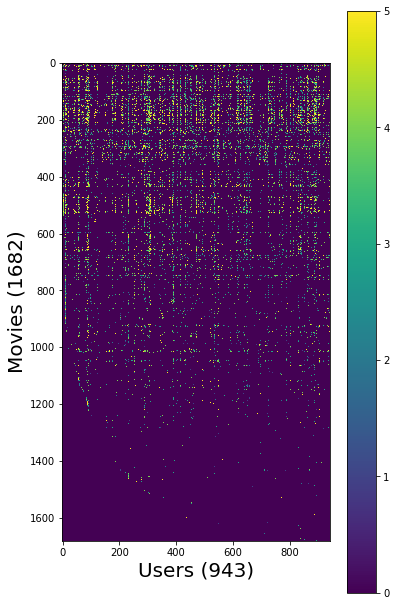

In [11]:
# "Visualize the ratings matrix"
fig = plt.figure(figsize=(6,6*(1682./943.)))
dummy = plt.imshow(Y)
dummy = plt.colorbar()
dummy = plt.ylabel('Movies (%d)'%nm,fontsize=20)
dummy = plt.xlabel('Users (%d)'%nu,fontsize=20)

In [12]:
# Read in the movie params matrices
mat = scipy.io.loadmat('./ex8_movieParams.mat')
print(mat.keys())
X = mat['X']
Theta = mat['Theta']
nu = int(mat['num_users'])
nm = int(mat['num_movies'])
nf = int(mat['num_features'])
# print(X)
# print(Theta)
# print(nu)
# print(nm)
# print(nf)

dict_keys(['__header__', '__version__', '__globals__', 'X', 'Theta', 'num_users', 'num_movies', 'num_features'])


In [13]:
def computeCost(theta, X, y, R, my_lambda = 0.0):
    m = y.size
    h = X.dot(theta.T) # (m x 2) * (2 x 1)
#     print((R * np.sum(np.square(h - y))).shape)
#     print(theta.shape)
    reg_term = my_lambda * np.sum(np.square(theta))
    return 0.5 * (np.sum(R * np.sum(np.square(h - y))) + reg_term)

# print(computeCost(Theta, X, Y, R))

In [14]:
def gradientDescent(theta, X, y, R, alpha, num_ite, my_lambda = 0.0):
    m = y.size
    j_history = np.zeros(num_ite)
    theta_history = []
    for i in range(num_ite):
        theta_history.append(list(theta[:,0]))
#         print(X.shape)
#         print((X.dot(theta.T) - y).shape)
        theta = theta - (alpha/m) * ((X.T.dot(X.dot(theta.T) - y)).T + my_lambda * theta)
        j_history[i] = computeCost(theta, X, y, R, my_lambda)
    return theta, j_history, theta_history

In [15]:
# init_theta = np.zeros((943, 10))
# theta, j_history, theta_history = gradientDescent(init_theta, X, Y, R, 0.01, 400, 0.5)
# print('Theta: ', theta)

Theta:  [[ 1.37708772e-03 -1.31532115e-03  1.29643374e-03 ...  2.28600667e-03
  -2.13292065e-03 -3.72761771e-04]
 [ 4.59799848e-04 -2.76138180e-04  2.24611800e-04 ...  6.43391892e-04
  -5.20989545e-04  2.97801932e-05]
 [ 1.93763366e-04 -1.32582376e-04  1.79013758e-04 ...  4.45906473e-04
  -2.80976939e-04  1.96952245e-05]
 ...
 [ 1.93816935e-04 -1.47543535e-04  1.32202667e-04 ...  1.97319157e-04
  -2.11426593e-04  8.35222924e-06]
 [ 5.60277806e-04 -4.04003235e-04  4.45229152e-04 ...  9.51843725e-04
  -7.12530054e-04 -8.90301461e-05]
 [ 9.46057680e-04 -5.81043149e-04  9.01770933e-04 ...  1.32124653e-03
  -1.27803280e-03 -3.78571945e-04]]


In [33]:
# # print(theta.dot(X.T))
# theta0 = theta[0].reshape(1,-1) # 1x10
# X0 = X[0].reshape(1,-1)
# print(theta0.dot(X0.T))

[[0.0089253]]


In [35]:
movies = []
with open('./movie_ids.txt') as f:
    for line in f:
        movies.append(' '.join(line.strip('\n').split(' ')[1:]))

# Rather than rate some movies myself, I'll use what was built-in to the homework
# (just so I can check my solutions)
my_ratings = np.zeros((1682,1))
my_ratings[0]   = 4
my_ratings[97]  = 2
my_ratings[6]   = 3
my_ratings[11]  = 5
my_ratings[53]  = 4
my_ratings[63]  = 5
my_ratings[65]  = 3
my_ratings[68]  = 5
my_ratings[182] = 4
my_ratings[225] = 5
my_ratings[354] = 5

In [40]:
# I'll re-read in the data because I shortened them earlier (to debug)
datafile = './ex8_movies.mat'
mat = scipy.io.loadmat( datafile )
Y = mat['Y']
R = mat['R']
# We'll use 10 features
nf = 10

In [41]:
# Add my ratings to the Y matrix, and the relevant row to the R matrix
myR_row = my_ratings > 0
Y = np.hstack((Y,my_ratings))
R = np.hstack((R,myR_row))
nm, nu = Y.shape

In [42]:
def normalizeRatings(myY, myR):
    """
    Preprocess data by subtracting mean rating for every movie (every row)
    This is important because without this, a user who hasn't rated any movies
    will have a predicted score of 0 for every movie, when in reality
    they should have a predicted score of [average score of that movie].
    """

    # The mean is only counting movies that were rated
    Ymean = np.sum(myY,axis=1)/np.sum(myR,axis=1)
    Ymean = Ymean.reshape((Ymean.shape[0],1))
    
    return myY-Ymean, Ymean

In [43]:
Ynorm, Ymean = normalizeRatings(Y,R)

In [45]:
init_theta = np.zeros((944, 10))
theta, j_history, theta_history = gradientDescent(init_theta, X, Ynorm, R, 0.01, 400, 0.5)
print('Theta: ', theta)

Theta:  [[-0.00435737  0.00273768 -0.00314809 ... -0.00799361  0.00589899
   0.00256147]
 [-0.00527369  0.00377576 -0.00421878 ... -0.0096345   0.00750922
   0.00296358]
 [-0.00553945  0.00391917 -0.00426433 ... -0.00983177  0.00774898
   0.00295351]
 ...
 [-0.00517332  0.00364803 -0.0039984  ... -0.00932637  0.00731788
   0.0028449 ]
 [-0.00478795  0.00347118 -0.00354234 ... -0.00895736  0.00675297
   0.00255566]
 [-0.00565956  0.00398889 -0.00436254 ... -0.01015259  0.00791842
   0.00291981]]


In [47]:
# print(theta.dot(X.T))
print(theta.shape)
print(X.shape)
theta0 = theta[0].reshape(1,-1) # 1x10
X0 = X[0].reshape(1,-1)
print(theta0.dot(X0.T) + Ymean[0])

(944, 10)
(1682, 10)
[[3.85097658]]


In [48]:
# After training the model, now make recommendations by computing
# the predictions matrix
prediction_matrix = X.dot(theta.T)

In [49]:
# Grab the last user's predictions (since I put my predictions at the
# end of the Y matrix, not the front)
# Add back in the mean movie ratings
my_predictions = prediction_matrix[:,-1] + Ymean.flatten()

In [58]:
# Sort my predictions from highest to lowest
pred_idxs_sorted = np.argsort(my_predictions)
pred_idxs_sorted[:] = pred_idxs_sorted[::-1]

print("Top recommendations for you:")
for i in range(10):
    print('Predicting rating %0.1f for movie %s.'%(my_predictions[pred_idxs_sorted[i]], movies[pred_idxs_sorted[i]]))
    
print("\nOriginal ratings provided:")
for i in range(len(my_ratings)):
    if my_ratings[i] > 0:
        print('Rated %d for movie %s.'%(my_ratings[i], movies[i]))

Top recommendations for you:
Predicting rating 5.0 for movie Aiqing wansui (1994).
Predicting rating 5.0 for movie Great Day in Harlem, A (1994).
Predicting rating 5.0 for movie Someone Else's America (1995).
Predicting rating 5.0 for movie Entertaining Angels: The Dorothy Day Story (1996).
Predicting rating 5.0 for movie Marlene Dietrich: Shadow and Light (1996) .
Predicting rating 5.0 for movie They Made Me a Criminal (1939).
Predicting rating 5.0 for movie Santa with Muscles (1996).
Predicting rating 5.0 for movie Saint of Fort Washington, The (1993).
Predicting rating 5.0 for movie Star Kid (1997).
Predicting rating 5.0 for movie Prefontaine (1997).

Original ratings provided:
Rated 4 for movie Toy Story (1995).
Rated 3 for movie Twelve Monkeys (1995).
Rated 5 for movie Usual Suspects, The (1995).
Rated 4 for movie Outbreak (1995).
Rated 5 for movie Shawshank Redemption, The (1994).
Rated 3 for movie While You Were Sleeping (1995).
Rated 5 for movie Forrest Gump (1994).
Rated 2 for